# Unsupervised Learning in Python
Instructor: Ben Wilson, Chief Data Scientist @ lateral.io

My work-along notes for datacamp's course
- started: 5-22-19

## Unsupervised learning
a class of machine learning techniques for discovering patterns in data.
- e.g. **clustering** customers by their purchases
- Compressing the data using purchase patterns (**dimension reduction**)

## Supervised vs unsupervised learning
- **Supervised** learning finds patterns for a prediction task
- e.g. classify tumors as benign or cancerous based on measurements (*labels*)
- **Unsupervised** learning finds patterns in data *without* a specific prediction task in mind

## Iris dataset
Measurements of iris plants of 3 differenent species:

### *Let's take a quick look at the data set*
seaborn has a convenient way to explore it

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [13]:
iris_seaborn = sns.load_dataset("iris")

In [15]:
type(iris_seaborn)

pandas.core.frame.DataFrame

In [16]:
iris_seaborn.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


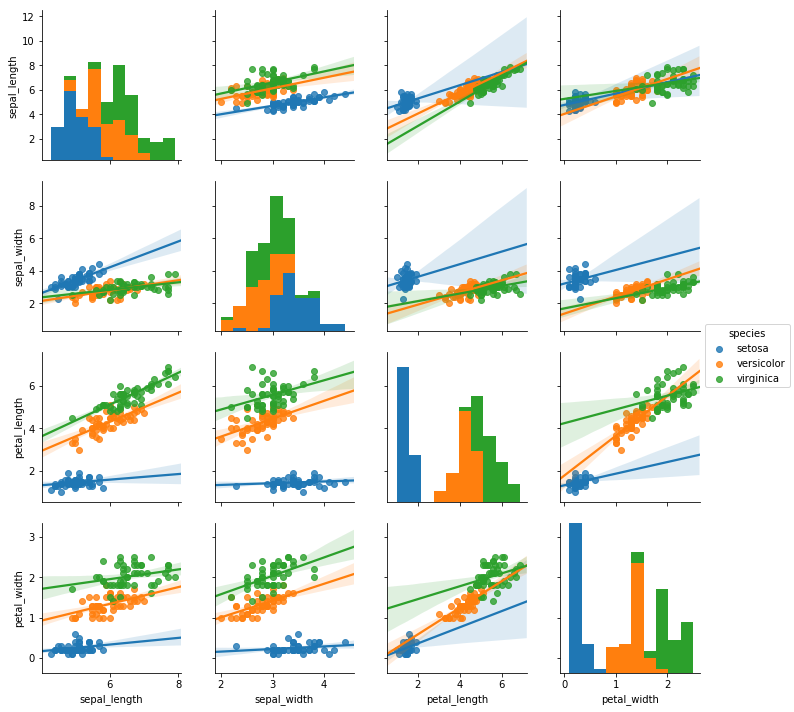

In [21]:
g = sns.pairplot(
    iris_seaborn, 
    hue = 'species', 
    kind = 'reg',
)

### *SKLearn has the data structured a bit differently*

In [2]:
# import the iris data set from sklearn
iris = datasets.load_iris()

In [3]:
type(iris)

sklearn.utils.Bunch

In [6]:
# looks like sklearn's "Bunch" is similar to a dict
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [26]:
print(iris['DESCR'], '\n')

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [31]:
print('Feature names\n', iris['feature_names'], '\n')
print('Target names\n', iris['target_names'], '\n')
for key in ['data', 'target']:
    print(key, '\n', iris[key][:5])

Feature names
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 

Target names
 ['setosa' 'versicolor' 'virginica'] 

data 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
target 
 [0 0 0 0 0]


## Arrays, features & samples
data is structured as 2D NumPy array
- Columns are measurements (the *features*)
- Rows represent iris plants (the *samples*)

## Iris data is 4-dimensional
- Iris samples are points in 4 dimensional space
- **Dimension** = number of features
    - 4 dimensions is too high to visualize but we can still gain insight by analyzing it.
    
## k-means clustering
- Finds clusters of samples
- Number of clusters must be specified
- implemented in **sklearn** library

## k-means clustering with scikit-learn
import it and specify the number of clusters we want to find (in our case three)

In [32]:
from sklearn.cluster import KMeans

In [33]:
model = KMeans(n_clusters=3, verbose=1)
# not sure what verbose will do but hopefully it will print some insightful info

In [36]:
samples = iris['data']
print(samples[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [37]:
# fit the model passing the array of samples
model.fit(samples)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 81.26545514705883
start iteration
done sorting
end inner loop
Iteration 1, inertia 79.6309054945055
start iteration
done sorting
end inner loop
Iteration 2, inertia 78.94084142614602
start iteration
done sorting
end inner loop
Iteration 3, inertia 78.94084142614602
center shift 0.000000e+00 within tolerance 1.134707e-04
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 84.8282125
start iteration
done sorting
end inner loop
Iteration 1, inertia 83.84481666666667
start iteration
done sorting
end inner loop
Iteration 2, inertia 82.6554303030303
start iteration
done sorting
end inner loop
Iteration 3, inertia 81.60585818327331
start iteration
done sorting
end inner loop
Iteration 4, inertia 80.315746215781
start iteration
done sorting
end inner loop
Iteration 5, inertia 79.68172190942472
start iteration
done sorting
end inner loop
Iteration 6, inertia 79.115566666

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=1)

### 🤔 *I wonder how the aglorithm works*
*Looks like the algorithm might iteratively "plant" random n-dimensional centroids and measure how well they "enclose" the data points (which I imagine may be something like measuring the distance from the centroid to each n-dimensional point) while reducing overlap between each cluster.*

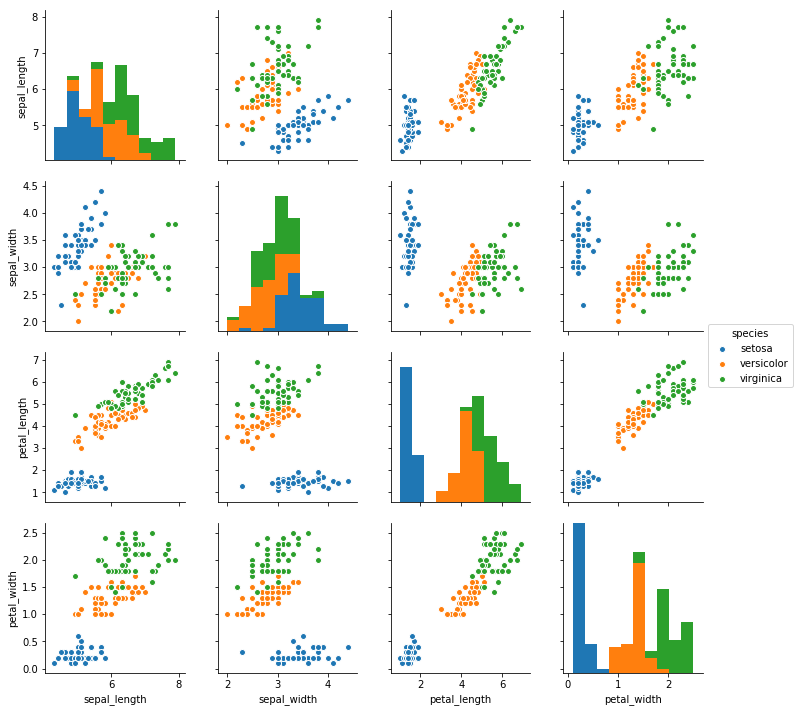

In [48]:
g = sns.pairplot(
    iris_seaborn, 
    hue = 'species', 
    #kind = 'reg',
)